Apply data cleaning techniques on any dataset (e,g, wine dataset). Techniques may include handling
missing values, outliers, inconsistent values. A set of validation rules can be prepared based on the
dataset and validations can be performed.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import plotly.express as px

In [2]:
data=pd.read_csv("dirty_iris.csv")

In [3]:
df=df=pd.DataFrame(data)
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa
148,6.4,3.1,NaN,1.8,virginica


In [4]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor


In [5]:
df.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa
148,6.4,3.1,NaN,1.8,virginica
149,5.8,2.6,4.0,NaN,versicolor


In [6]:
n_row,n_col=df.shape
print("The data has {} rows {} cols.".format(n_row,n_col))

The data has 150 rows 5 cols.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  140 non-null    float64
 1   Sepal.Width   133 non-null    float64
 2   Petal.Length  131 non-null    float64
 3   Petal.Width   138 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,140.000000,133.000000,131.000000,138.0
mean,6.559286,3.390977,4.449962,inf
std,6.800940,3.315310,5.769299,NaN
min,0.000000,-3.000000,0.000000,0.1
25%,5.100000,2.800000,1.600000,0.3
50%,5.750000,3.000000,4.500000,1.3
75%,6.400000,3.300000,5.100000,1.8
max,73.000000,30.000000,63.000000,inf


In [9]:
df.isnull().any()

Sepal.Length     True
Sepal.Width      True
Petal.Length     True
Petal.Width      True
Species         False
dtype: bool

In [10]:
df['Sepal.Length'].unique()

array([ 6.4,  6.3,  6.2,  5. ,  5.7,  5.3,  5.9,  5.8,  4.8,  6. ,  6.8,
        nan,  5.5,  4.7,  5.6,  4.9,  5.4,  6.7,  4.6, 73. ,  6.5,  4.4,
        6.6,  0. ,  7.7,  7. ,  5.2,  5.1,  7.4,  4.3,  7.2,  6.1,  6.9,
        7.6,  7.9,  4.5, 49. ])

In [11]:
df['Sepal.Width'].unique()

array([ 3.2,  3.3,  nan,  3.4,  2.6,  2.7,  3. ,  3.1,  3.5,  2.8,  3.9,
       -3. ,  4. ,  3.6, 29. ,  2.9,  2.2,  2.5,  4.2,  3.8,  2.3,  3.7,
        4.1, 30. ,  0. ])

In [12]:
df['Petal.Length'].unique()

array([ 4.5  ,  6.   ,  5.4  ,  1.6  ,  3.5  ,    nan,  5.3  ,  5.1  ,
        4.1  ,  4.8  ,  1.7  ,  4.   ,  1.3  ,  4.2  ,  5.7  ,  5.9  ,
        1.4  ,  1.5  , 63.   ,  0.82 , 23.   ,  5.5  ,  5.8  ,  1.2  ,
        3.9  ,  6.7  ,  4.7  ,  4.4  ,  5.6  ,  3.3  ,  6.1  ,  1.1  ,
        4.9  ,  4.6  ,  6.6  ,  0.   ,  6.4  ,  5.2  ,  1.9  ,  4.3  ,
        5.   ,  0.925,  6.9  , 14.   ,  3.6  ,  3.8  ])

In [13]:
df['Petal.Width'].unique()

array([1.5, 2.5, 2.3, 0.4, 1. , 0.2, nan, 1.8, 0.6, 1.6, 1.4, 1.3, 0.1,
       2.1, 2. , 1.2, 1.9, 2.2, 0.3, 1.1, inf, 1.7, 2.4, 0.5])

In [14]:
df1=df.replace(np.inf,np.nan)

In [15]:
with pd.option_context('mode.use_inf_as_na', True):
  df1=df1.replace(np.nan,df.mean())
df1

C:\Users\CSLab\AppData\Local\Temp\ipykernel_12628\1688229974.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1=df1.replace(np.nan,df.mean())


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.200000,4.500000,1.500000,versicolor
1,6.3,3.300000,6.000000,2.500000,virginica
2,6.2,3.390977,5.400000,2.300000,virginica
3,5.0,3.400000,1.600000,0.400000,setosa
4,5.7,2.600000,3.500000,1.000000,versicolor
...,...,...,...,...,...
145,6.7,3.100000,5.600000,2.400000,virginica
146,5.6,3.000000,4.500000,1.500000,versicolor
147,5.2,3.500000,1.500000,0.200000,setosa
148,6.4,3.100000,4.449962,1.800000,virginica


In [16]:
df1['Petal.Width'].unique()

array([1.5       , 2.5       , 2.3       , 0.4       , 1.        ,
       0.2       , 1.20729927, 1.8       , 0.6       , 1.6       ,
       1.4       , 1.3       , 0.1       , 2.1       , 2.        ,
       1.2       , 1.9       , 2.2       , 0.3       , 1.1       ,
       1.7       , 2.4       , 0.5       ])

In [17]:
df1.isna().any()

Sepal.Length    False
Sepal.Width     False
Petal.Length    False
Petal.Width     False
Species         False
dtype: bool

In [18]:
df1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

       R1 (All Values Positive)  R2 (Petal Length >= 2*Petal Width)  \
True                        146                                 141   
False                         4                                   9   

       R3 (Sepal Length <= 30 cm)  R4 (Sepal Length > Petal Length)  
True                          148                               147  
False                           2                                 3  


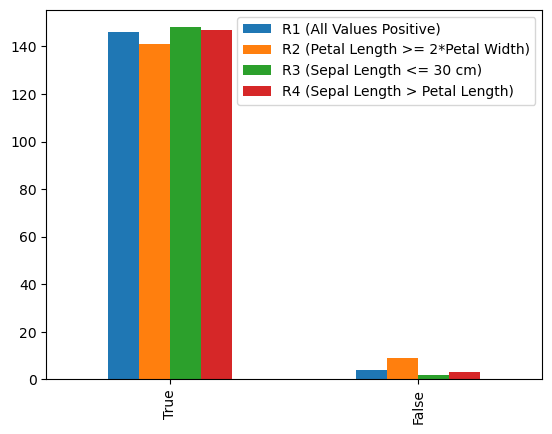

In [19]:
r1 = lambda row: all(value > 0 for value in row[:-1])
r2 = lambda row: row['Petal.Length'] >= 2 * row['Petal.Width']
r3 = lambda row: row['Sepal.Length'] <= 30
r4 = lambda row: row['Sepal.Length'] > row['Petal.Length']

r1_res = df1.apply(r1, axis=1)
r2_res = df1.apply(r2, axis=1)
r3_res = df1.apply(r3, axis=1)
r4_res = df1.apply(r4, axis=1)

rules_res = pd.DataFrame({
    'R1 (All Values Positive)': r1_res.value_counts(),
    'R2 (Petal Length >= 2*Petal Width)': r2_res.value_counts(),
    'R3 (Sepal Length <= 30 cm)': r3_res.value_counts(),
    'R4 (Sepal Length > Petal Length)': r4_res.value_counts()
})
print(rules_res)
fig2=rules_res.plot.bar()

In [20]:
num_col = df1.select_dtypes(include=['float64', 'int64']).columns

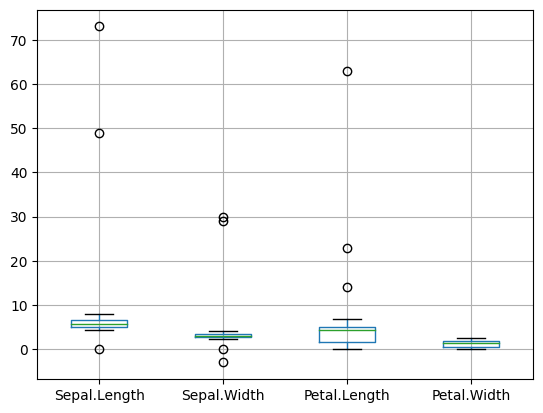

In [22]:
boxplot = df1.boxplot()

In [ ]:
Q1 = df1['Sepal.Length'].quantile(0.25)
Q3 = df1['Sepal.Length'].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = ((df1['Sepal.Length'] < (Q1 - 1.5 * IQR)) | (df1['Sepal.Length'] > (Q3 + 1.5 * IQR)))
df2=df1.drop(outlier_mask.index)

In [ ]:
Q1 = df1['Sepal.Width'].quantile(0.25)
Q3 = df1['Sepal.Width'].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = ((df1['Sepal.Width'] < (Q1 - 1.5 * IQR)) | (df1['Sepal.Width'] > (Q3 + 1.5 * IQR)))
df2=df1.drop(outlier_mask.index)

In [ ]:
Q1 = df1['Petal.Length'].quantile(0.25)
Q3 = df1['Petal.Length'].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = ((df1['Petal.Length'] < (Q1 - 1.5 * IQR)) | (df1['Petal.Length'] > (Q3 + 1.5 * IQR)))
df2=df1.drop(outlier_mask.index)

In [ ]:
Q1 = df1['Petal.Width'].quantile(0.25)
Q3 = df1['Petal.Width'].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = ((df1['Petal.Width'] < (Q1 - 1.5 * IQR)) | (df1['Petal.Width'] > (Q3 + 1.5 * IQR)))
df2=df1.drop(outlier_mask.index)

In [ ]:
#for col in num_col:
    #Q1 = df1[col].quantile(0.25)
    #Q3 = df1[col].quantile(0.75)
    #IQR = Q3 - Q1
    #outlier_mask = ((df1[col] < (Q1 - 1.5 * IQR)) | (df1[col] > (Q3 + 1.5 * IQR)))
    #if outlier_mask.any():
        #print("Column '{}' has outliers.".format(col))

Column 'Sepal.Length' has outliers.
Column 'Sepal.Width' has outliers.
Column 'Petal.Length' has outliers.
Column 'Petal.Width' has outliers.


In [ ]:
#df2=df1.copy()
#for col in num_col:
    #Q1 = df2[col].quantile(0.25)
    #Q3 = df2[col].quantile(0.75)
    #IQR = Q3 - Q1
    #outlier_mask = ((df2[col] < (Q1 - 1.5 * IQR)) | (df2[col] > (Q3 + 1.5 * IQR)))
    #df2=df2.drop(outlier_mask.index)